In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
from itertools import combinations, product

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from dogo.results import get_experiment_details
from dogo.wasserstein.wasserstein_distance import experiment_distances

In [3]:
MP4_PAP8_DATASETS = ['D3RLPY-MP4-P0-3', 'D3RLPY-MP4-P1-4', 'D3RLPY-PAP8-P0-3', 'D3RLPY-PAP8-P1-4']

MP4_P0_3_NO_REX_EXPS = ['MP401', 'MP402', 'MP403']
MP4_P1_4_NO_REX_EXPS = ['MP413', 'MP414', 'MP415']
PAP8_P0_3_NO_REX_EXPS = ['MP425', 'MP426', 'MP427']
PAP8_P1_4_NO_REX_EXPS = ['MP437', 'MP438', 'MP439']

MP4_P0_3_REX_EXPS = ['MP410', 'MP411', 'MP412']
MP4_P1_4_REX_EXPS = ['MP422', 'MP423', 'MP424']
PAP8_P0_3_REX_EXPS = ['MP434', 'MP435', 'MP436']
PAP8_P1_4_REX_EXPS = ['MP446', 'MP447', 'MP448']

In [4]:
# list(combinations(MP4_P0_3_EXPS, 2))

In [5]:
# list(product(MP4_P0_3_EXPS, MP4_P1_4_EXPS))

In [6]:
def experiment_combination_distances(exps, datasets):
    combs = combinations(exps, 2)
    wd_resulst = []
    for exp_1, exp_2 in combs:
        wd_resulst.append(experiment_distances(exp_1, exp_2, datasets))
    return np.vstack(wd_resulst)

def experiment_product_distances(exps_1, exps_2, datasets):
    prod = product(exps_1, exps_2)
    wd_resulst = []
    for exp_1, exp_2 in prod:
        wd_resulst.append(experiment_distances(exp_1, exp_2, datasets))
    return np.vstack(wd_resulst)

In [7]:
MP4_P0_P3_no_rex_cross_seed = np.mean(experiment_combination_distances(MP4_P0_3_NO_REX_EXPS, MP4_PAP8_DATASETS), axis=0)
MP4_P1_P4_no_rex_cross_seed = np.mean(experiment_combination_distances(MP4_P1_4_NO_REX_EXPS, MP4_PAP8_DATASETS), axis=0)
PAP8_P0_P3_no_rex_cross_seed = np.mean(experiment_combination_distances(PAP8_P0_3_NO_REX_EXPS, MP4_PAP8_DATASETS), axis=0)
PAP8_P1_P4_no_rex_cross_seed = np.mean(experiment_combination_distances(PAP8_P1_4_NO_REX_EXPS, MP4_PAP8_DATASETS), axis=0)

In [8]:
# MP4_P0_3_MP4_P1_4 = np.mean(experiment_product_distances(MP4_P0_3_EXPS, MP4_P1_4_EXPS, MP4_PAP8_DATASETS), axis=0)
# MP4_P0_3_PAP8_P0_P3 = np.mean(experiment_product_distances(MP4_P0_3_EXPS, PAP8_P0_3_EXPS, MP4_PAP8_DATASETS), axis=0)

In [9]:
MP4_PAP8_no_rex_results = np.vstack((
    MP4_P0_P3_no_rex_cross_seed,
    MP4_P1_P4_no_rex_cross_seed,
    PAP8_P0_P3_no_rex_cross_seed,
    PAP8_P1_P4_no_rex_cross_seed
))

In [10]:
MP4_P0_P3_rex_cross_seed = np.mean(experiment_combination_distances(MP4_P0_3_REX_EXPS, MP4_PAP8_DATASETS), axis=0)
MP4_P1_P4_rex_cross_seed = np.mean(experiment_combination_distances(MP4_P1_4_REX_EXPS, MP4_PAP8_DATASETS), axis=0)
PAP8_P0_P3_rex_cross_seed = np.mean(experiment_combination_distances(PAP8_P0_3_REX_EXPS, MP4_PAP8_DATASETS), axis=0)
PAP8_P1_P4_rex_cross_seed = np.mean(experiment_combination_distances(PAP8_P1_4_REX_EXPS, MP4_PAP8_DATASETS), axis=0)

In [11]:
MP4_PAP8_rex_results = np.vstack((
    MP4_P0_P3_rex_cross_seed,
    MP4_P1_P4_rex_cross_seed,
    PAP8_P0_P3_rex_cross_seed,
    PAP8_P1_P4_rex_cross_seed
))

Text(0, 0.5, 'Trained With')

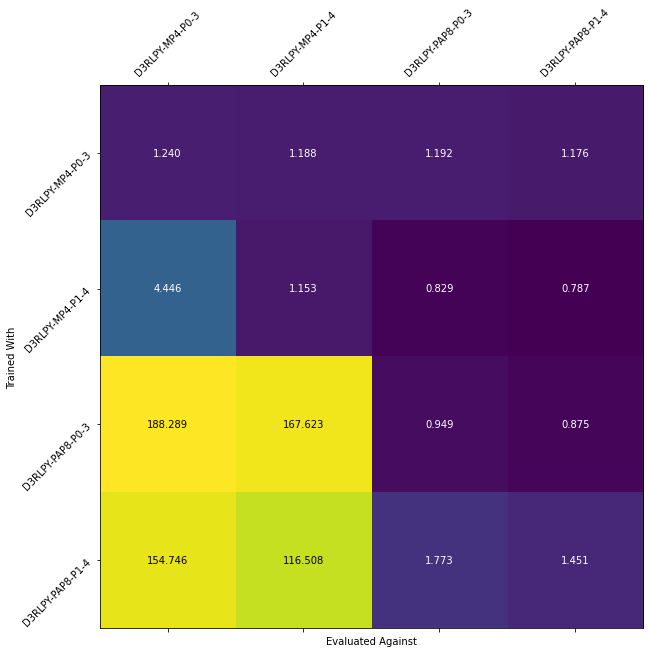

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))

mat = ax.matshow(np.log(MP4_PAP8_no_rex_results))
ax.set_xticks(range(len(MP4_PAP8_DATASETS)))
ax.set_yticks(range(len(MP4_PAP8_DATASETS)))
ax.set_xticklabels(MP4_PAP8_DATASETS, rotation=45)
ax.set_yticklabels(MP4_PAP8_DATASETS, rotation=45)

for (i,j), z in np.ndenumerate(MP4_PAP8_no_rex_results):
    if z != 0:
        ax.text(j, i, '{0:.3f}'.format(z), ha="center", va="center", color='w' if z < 50 else 'k')

ax.set_xlabel('Evaluated Against')
ax.set_ylabel('Trained With')
# fig.colorbar(mat)

Text(0, 0.5, 'Trained With')

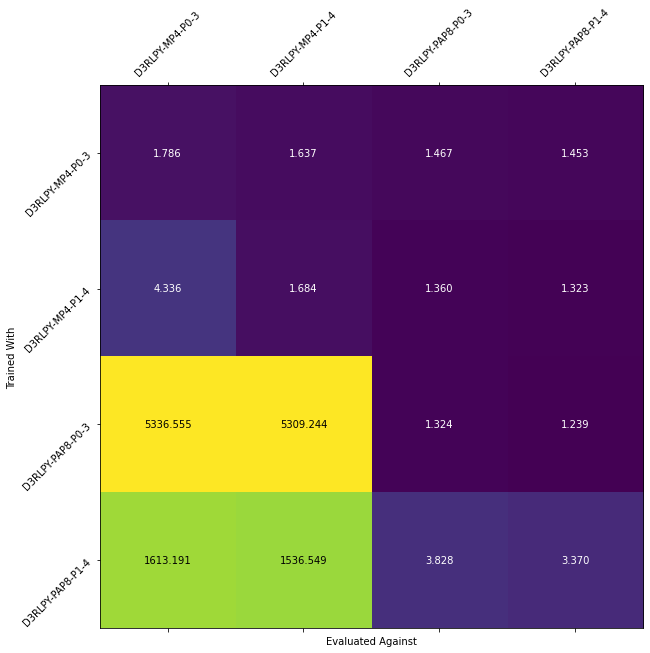

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))

mat = ax.matshow(np.log(MP4_PAP8_rex_results))
ax.set_xticks(range(len(MP4_PAP8_DATASETS)))
ax.set_yticks(range(len(MP4_PAP8_DATASETS)))
ax.set_xticklabels(MP4_PAP8_DATASETS, rotation=45)
ax.set_yticklabels(MP4_PAP8_DATASETS, rotation=45)

for (i,j), z in np.ndenumerate(MP4_PAP8_rex_results):
    if z != 0:
        ax.text(j, i, '{0:.3f}'.format(z), ha="center", va="center", color='w' if z < 50 else 'k')

ax.set_xlabel('Evaluated Against')
ax.set_ylabel('Trained With')
# fig.colorbar(mat)